# Google Drive Mounting

This code snippet uses the `drive.mount('/content/drive')` command in Google Colab to mount Google Drive. This allows access to files and notebooks stored on Google Drive directly within the Colab environment.

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 1: Importing Required Libraries

This section imports essential libraries for data manipulation, dimensionality reduction, and building an XGBoost regression model. Key libraries include NumPy, Pandas, scikit-learn's PCA, XGBoost, and Matplotlib for data visualization.

- **NumPy (`import numpy as np`):** Used for efficient numerical operations in linear algebra.

- **Pandas (`import pandas as pd`):** Provides data structures for efficient data manipulation and analysis, particularly for reading and processing CSV files.

- **PCA (`from sklearn.decomposition import PCA`):** Enables dimensionality reduction, a technique often used in feature engineering.

- **XGBoost (`import xgboost as xgb` and `from xgboost import XGBRegressor`):** A popular library for gradient-boosted trees, utilized here for building a regression model.

- **Matplotlib (`import matplotlib.pyplot as plt`):** Used for creating visualizations like plots and charts.

- **Warnings Suppression (`import warnings`):** Suppresses warning messages to enhance code readability during execution.

In [35]:
# Step1: Import the required libraries

# linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
# for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Step 2: Reading Data from train.csv

This section reads data from the 'train.csv' file located at the specified path. It utilizes Pandas to create a DataFrame (`df_train`) for further analysis.

- **File Path Definition (`train_path = '/content/drive/MyDrive/DOAI/train.csv'`):** Specifies the file path for the training data.

- **Data Reading (`df_train = pd.read_csv(train_path)`):** Reads the CSV file into a Pandas DataFrame (`df_train`), making the dataset accessible for exploration and analysis.

- **Data Overview:**
  - **Size Information (`print('Size of the training set: {} rows and {} columns'.format(*df_train.shape))`):** Prints the number of rows and columns in the training dataset.
  
  - **Preview Data (`df_train.head()`):** Displays the first few rows of the training data to provide a glimpse of its structure and content.

In [36]:
# Step2: Read the data from train.csv

train_path = '/content/drive/MyDrive/DOAI/train.csv'
df_train = pd.read_csv(train_path)
# let us understand the data
print('Size of the training set: {} rows and {} columns'
      .format(*df_train.shape))
# print a few rows and see how the data looks like
df_train.head()

Size of the training set: 4209 rows and 378 columns


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


# Step 3: Collecting Y Values

In this step, the target variable 'y' is extracted from the training dataset and stored in an array (`y_train`). This separation is essential as the 'y' values serve as the prediction output during the learning process.

- **Target Variable Extraction (`y_train = df_train['y'].values`):** Creates an array (`y_train`) containing the values of the target variable 'y' from the training dataset. This isolated array is crucial for training the predictive model.

In [37]:
# Step3: Collect the Y values into an array

# separate the y from the data as we will use this to learn as
# the prediction output
y_train = df_train['y'].values

# Step 4: Understanding Data Types

This step focuses on analyzing the data types of features with names containing 'X' in the training dataset.

- **Column Selection (`cols = [c for c in df_train.columns if 'X' in c]`):** Identifies and selects columns with names containing 'X'.

- **Number of Features (`print('Number of features: {}'.format(len(cols)))`):** Prints the count of features (columns) with names containing 'X' in the training dataset.

- **Feature Types Analysis:**
  - **Data Types Summary (`df_train[cols].dtypes.value_counts()`):** Counts and displays the distribution of data types among the selected features. This information provides insights into the nature of the features, such as whether they are numerical or categorical.

In [38]:
# Step4: Understand the data types we have

# iterate through all the columns which have X in the name of the column
cols = [c for c in df_train.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
df_train[cols].dtypes.value_counts()

Number of features: 376
Feature types:


int64     368
object      8
dtype: int64

# Step 5: Counting Data in Each Column

This step involves counting and categorizing features based on their characteristics.

- **Loop Through Columns (`for c in cols`):** Iterates through columns with names containing 'X'.

- **Feature Type and Uniqueness Calculation:**
  - **Data Type (`typ = df_train[c].dtype`):** Determines the data type of the current feature.
  - **Unique Values (`uniq = len(np.unique(df_train[c]))`):** Calculates the number of unique values in the feature.

- **Feature Categorization:**
  - **Constant Features (`counts[0]`):** Features with only one unique value.
  - **Binary Features (`counts[1]`):** Features with two unique values and of type np.int64.
  - **Categorical Features (`counts[2]`):** Features with more than two unique values or of a different data type.

- **Printing Results:**
  - **Summary of Counts (`print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))`):** Prints the counts of constant, binary, and categorical features.
  - **List of Constant and Categorical Features (`print('Constant features:', counts[0])` and `print('Categorical features:', counts[2])`):** Displays the names of constant and categorical features.

## Constant, Binary, and Categorical Feature Analysis

In this step, features with their respective counts and names are categorized based on their characteristics:

- **Constant Features:** 12 features have a constant value, meaning they do not provide useful information for modeling.
  - ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

- **Binary Features:** 356 features are binary, having two unique values and being of type np.int64.

- **Categorical Features:** 8 features are categorical, containing more than two unique values or being of a different data type.
  - ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

Understanding the distribution and nature of these features is crucial for further preprocessing and modeling.

In [39]:
# Step5: Count the data in each of the columns

counts = [[], [], []]
for c in cols:
    typ = df_train[c].dtype
    uniq = len(np.unique(df_train[c]))
    if uniq == 1:
        counts[0].append(c)
    elif uniq == 2 and typ == np.int64:
        counts[1].append(c)
    else:
        counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'
      .format(*[len(c) for c in counts]))
print('Constant features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 12 Binary features: 356 Categorical features: 8

Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


# Step 6: Reading Test Data and Data Preparation

This step involves reading data from the 'test.csv' file, extracting relevant columns, and preparing the data for learning.

- **Test Data Reading (`df_test = pd.read_csv(test_path)`):** Reads the CSV file for test data into a Pandas DataFrame (`df_test`).

- **Columns Removal (`usable_columns = list(set(df_train.columns) - set(['ID', 'y']))`):** Defines the columns to be used for learning by excluding 'ID' and 'y' columns. This ensures the removal of irrelevant identifiers and the target variable from the feature set.

- **Target Variable Separation (`y_train = df_train['y'].values`):** Creates an array (`y_train`) containing the target variable 'y' values from the training dataset.

- **ID Extraction (`id_test = df_test['ID'].values`):** Creates an array (`id_test`) containing the 'ID' values from the test dataset.

- **Feature Dataframes (`x_train = df_train[usable_columns]` and `x_test = df_test[usable_columns]`):** Creates DataFrames (`x_train` and `x_test`) containing the selected features for training and testing, respectively.

In [40]:
# Step6: Read the test.csv data

test_path = '/content/drive/MyDrive/DOAI/test.csv'
df_test = pd.read_csv(test_path)

# remove columns ID and Y from the data as they are not used for learning
usable_columns = list(set(df_train.columns) - set(['ID', 'y']))
y_train = df_train['y'].values
id_test = df_test['ID'].values

x_train = df_train[usable_columns]
x_test = df_test[usable_columns]

# Step 7: Checking for Null and Unique Values

This step involves assessing the presence of null values in both the training and test datasets.

- **Checking Missing Values (`check_missing_values(df)`):**
  - **For Training Data (`check_missing_values(x_train)`):** Determines if there are any missing values in the training dataset. Prints a message accordingly.
  - **For Test Data (`check_missing_values(x_test)`):** Determines if there are any missing values in the test dataset. Prints a message accordingly.

This check is essential to ensure the completeness of the data before proceeding with further analysis and modeling.

## Missing Values Check
In both the training and test datasets:

There are no missing values in the dataframe.
This indicates that the datasets are complete, with no null values, which is important for accurate analysis and modeling.

In [41]:
# Step7: Check for null and unique values for test and train sets

def check_missing_values(df):
    if df.isnull().any().any():
        print("There are missing values in the dataframe")
    else:
        print("There are no missing values in the dataframe")
check_missing_values(x_train)
check_missing_values(x_test)


There are no missing values in the dataframe
There are no missing values in the dataframe


# Step 8: Feature Preprocessing

This step focuses on preparing the features for model training:

- **Removing Zero Variance Features:**
  - Columns with zero variance (constant values) are removed from both the training and test datasets.

- **Label Encoding for Categorical Features:**
  - Categorical columns with cardinality greater than two are processed using label encoding.
  - A mapping function based on the ordinal values of characters is applied to transform categorical values into numerical representations.

These preprocessing steps enhance the quality and compatibility of features for subsequent machine learning tasks.

In [42]:
# Step8: If for any column(s), the variance is equal to zero,
# then you need to remove those variable(s).
# Apply label encoder

for column in usable_columns:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
        x_train.drop(column, axis=1, inplace=True) # Column with only one
        # value is useless so we drop it
        x_test.drop(column, axis=1, inplace=True)
    if cardinality > 2: # Column is categorical
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
x_train.head()

,X195,X21,X359,X106,X257,X272,X242,X223,X110,X31,...,X60,X340,X276,X92,X292,X385,X324,X217,X254,X41
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


# Step 9: Confirming Numerical Data

This step ensures that the features in the training dataset have been successfully converted into numerical format.

- **Filtering Columns (`existing_cols = [col for col in cols if col in x_train.columns]`):**
  - Identifies and filters columns present in both the original feature set (`cols`) and the transformed training dataset (`x_train`).

- **Feature Type Confirmation:**
  - **Data Types Summary (`x_train[existing_cols].dtypes.value_counts()`):** Counts and displays the distribution of data types among the filtered features. This information confirms that the features are now in numerical format.

This confirmation step is crucial to verify that the preprocessing has effectively converted categorical features into a suitable numerical representation for machine learning models.

In [43]:
# Step9: Make sure the data is now changed into numericals

# Filter columns present in x_train
existing_cols = [col for col in cols if col in x_train.columns]
print('Feature types:')
x_train[existing_cols].dtypes.value_counts()

Feature types:


int64    364
dtype: int64

# Step 10: Dimensionality Reduction

In this step, linear dimensionality reduction is applied using Singular Value Decomposition (SVD) to project the data into a lower-dimensional space.

- **Number of Components (`n_comp = 12`):** Specifies the desired number of components for dimensionality reduction.

- **PCA Transformation for Training Data:**
  - `pca = PCA(n_components=n_comp, random_state=420)`: Initializes the PCA object with the specified number of components.
  - `pca2_results_train = pca.fit_transform(x_train)`: Applies PCA transformation to the training data.

- **PCA Transformation for Test Data:**
  - `pca2_results_test = pca.transform(x_test)`: Applies the same PCA transformation to the test data.

This dimensionality reduction step helps in simplifying the dataset while retaining important information, reducing computational complexity for subsequent modeling tasks.

In [44]:
# Step10: Perform dimensionality reduction
# Linear dimensionality reduction using Singular Value Decomposition of
# the data to project it to a lower dimensional space.
n_comp = 12
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(x_train)
pca2_results_test = pca.transform(x_test)

# Step 11: Training with XGBoost

In this step, the XGBoost regressor is utilized for model training.

- **XGBoost Regressor Import (`from xgboost import XGBRegressor`):**
  - Imports the XGBRegressor module for building a regression model.

- **Data Splitting (`train_test_split`):**
  - `train_test_split(pca2_results_train, y_train, test_size=0.2, random_state=4242)`: Splits the transformed training data into training and validation sets.

- **XGBRegressor Configuration (`clf = XGBRegressor(...)`):**
  - Configures the XGBRegressor model with specific parameters.
  - Objective: 'reg:squarederror' (Regression task).
  - Learning Rate (eta): 0.02.
  - Maximum Depth: 4.

- **Model Training (`clf.fit(...)`):**
  - Fits the XGBoost model to the training data.
  - Evaluates the model's performance on the validation set using the root mean squared error (eval_metric='rmse').
  - Implements early stopping to prevent overfitting (early_stopping_rounds=50).

This step completes the training of the XGBoost regression model, paving the way for subsequent evaluation and prediction tasks.

## XGBoost Training Summary

The XGBoost regressor was trained with the following summary:

- **Training Progress:**
  - [0] to [99]: Displays the progress of the training process over 100 rounds.
  - Validation set root mean squared error (validation_0-rmse) decreases over successive rounds, indicating improvement in model performance.

- **XGBoost Regressor Configuration:**
  - **Base Parameters:**
    - Objective: 'reg:squarederror' (Regression task).
    - Learning Rate (eta): 0.02.
    - Maximum Depth: 4.

  - **Additional Parameters:**
    - Early Stopping Rounds: 50 (prevents overfitting).
    - Evaluation Metric: 'rmse' (root mean squared error).

This information provides insights into the training dynamics and the configured parameters for the XGBoost regressor. The model appears to be improving in performance as the number of rounds increases.

In [45]:
# Step11: Training using xgboost

# Using pca2_results_train for training
x_train_reduced, x_valid_reduced, y_train_reduced, y_valid_reduced = train_test_split(
    pca2_results_train,
    y_train,
    test_size=0.2,
    random_state=4242
)
print("Shape of pca2_results_train:", pca2_results_train.shape)
print("Shape of y_train:", y_train.shape)


# Create XGBRegressor instead of using xgb.train
clf = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    eta=0.02,
    max_depth=4
)

# Fit the model
clf.fit(x_train_reduced, y_train_reduced, eval_metric='rmse', eval_set=[(x_valid_reduced, y_valid_reduced)], early_stopping_rounds=50, verbose=10)


Shape of pca2_results_train: (4209, 12)
Shape of y_train: (4209,)
[0]	validation_0-rmse:11.78153
[10]	validation_0-rmse:10.91819
[20]	validation_0-rmse:10.30564
[30]	validation_0-rmse:9.85722
[40]	validation_0-rmse:9.54351
[50]	validation_0-rmse:9.31197
[60]	validation_0-rmse:9.12695
[70]	validation_0-rmse:8.94562
[80]	validation_0-rmse:8.80762
[90]	validation_0-rmse:8.70321
[99]	validation_0-rmse:8.62389


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.02, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Step 12: Evaluating Model Performance on the Validation Set

In this step, the trained XGBoost model is evaluated on the validation set, and performance metrics are calculated.

- **Validation Set Predictions (`val_predictions = clf.predict(x_valid)`):**
  - Generates predictions on the validation set using the trained XGBoost model.

- **Evaluation Metrics:**
  - **Root Mean Squared Log Error (RMSLE) Calculation (`rmsle = np.sqrt(mean_squared_log_error(y_valid, val_predictions))`):**
    - Measures the ratio between the logarithm of the predicted and actual values, providing an evaluation of prediction accuracy.
  
  - **R2 Score Calculation (`r2 = r2_score(y_valid, val_predictions)`):**
    - Computes the R2 score, which represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

- **Printed Metrics:**
  - **RMSLE on Validation Set (`print(f"RMSLE on Validation Set: {rmsle}")`):**
    - Displays the calculated RMSLE on the validation set.
  
  - **R2 Score on Validation Set (`print(f"R2 Score on Validation Set: {r2}")`):**
    - Displays the computed R2 score on the validation set.

These metrics provide a quantitative assessment of the model's performance on the validation set, helping to gauge its predictive accuracy. Additionally, predictions on the test set are saved to a CSV file named 'xgb.csv'.

In [46]:
# Step12: Evaluate the Model Performance on the Validation Set

# Predictions on validation set
val_predictions = clf.predict(x_valid_reduced)

# Evaluate the model on the validation set using RMSLE and R2 Score
rmsle = np.sqrt(mean_squared_log_error(y_valid_reduced, val_predictions))
r2 = r2_score(y_valid_reduced, val_predictions)

print(f"RMSLE on Validation Set: {rmsle}")
print(f"R2 Score on Validation Set: {r2}")

# Transform the test set using the same PCA
pca2_results_test = pca.transform(x_test)

# Predict test results directly without creating DMatrix
p_test = clf.predict(pca2_results_test)

# Creating a DataFrame with ID and predicted values
sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = p_test

# Save the DataFrame to a CSV file
sub.to_csv('/content/drive/MyDrive/DOAI/xgb_test_results.csv', index=False)

# Display the first few rows of the DataFrame
sub.head()


RMSLE on Validation Set: 0.08305764339070376
R2 Score on Validation Set: 0.4713258215451598


,ID,y
0,1,83.439697
1,2,97.772987
2,3,82.857391
3,4,80.945488
4,5,108.453346


# Visualization 1: Actual vs Predicted on Validation Set

This scatter plot visualizes the relationship between actual and predicted values on the validation set.

- **Scatter Plot (`plt.scatter(y_valid, val_predictions, label='Actual', marker='o', color='blue')`):**
  - Blue dots represent the actual values.
  - The red dashed line indicates the ideal scenario where actual and predicted values are identical.

- **Axis Labels and Title (`plt.xlabel("Actual values")`, `plt.ylabel("Predicted values")`, `plt.title("Actual vs Predicted on Validation Set")`):**
  - Labels and title provide context and interpretation for the plot.

- **Legend (`plt.legend()`):**
  - Includes a legend with labels for clarity.

This visualization allows for an intuitive comparison of model predictions against actual values.

# Visualization 2: Residuals Distribution

This histogram displays the distribution of residuals (the differences between actual and predicted values) on the validation set.

- **Histogram Plot (`plt.hist(residuals, bins=50, alpha=0.7, color='blue', label='Residuals')`):**
  - Blue bars represent the frequency of residuals.
  
- **Zero Residuals Line (`plt.axvline(x=0, color='red', linestyle='--', label='Zero Residuals')`):**
  - A red dashed line at 0 indicates the point where predictions perfectly match actual values.

- **Axis Labels and Title (`plt.xlabel("Residuals")`, `plt.ylabel("Frequency")`, `plt.title("Residuals Distribution")`):**
  - Labels and title provide context and interpretation for the plot.

- **Legend (`plt.legend()`):**
  - Includes a legend with labels for clarity.

This visualization provides insights into the distribution and pattern of residuals, helping to assess the model's predictive accuracy.

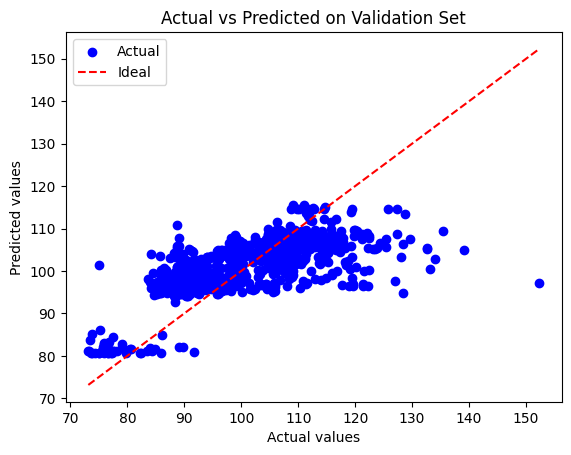

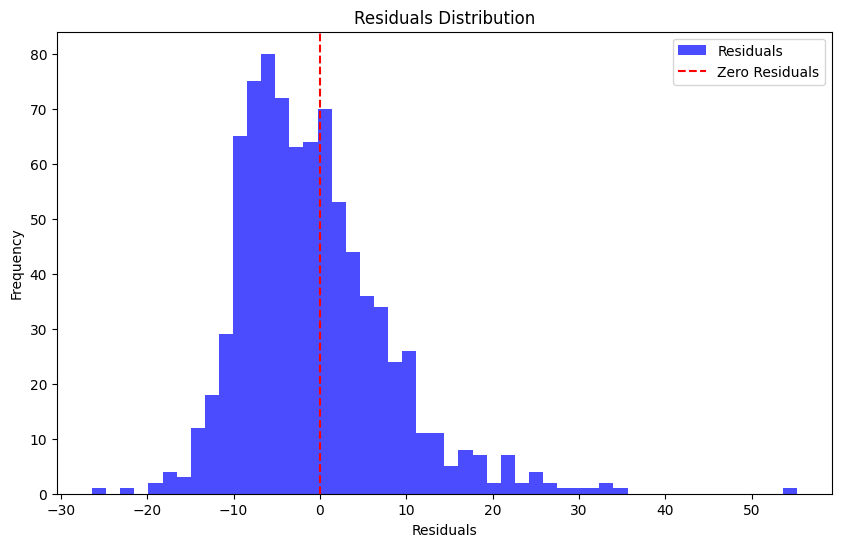

In [47]:
# Visualization 1: Actual vs Predicted on Validation Set
plt.scatter(y_valid_reduced, val_predictions, label='Actual', marker='o', color='blue')
plt.plot([min(y_valid_reduced), max(y_valid_reduced)], [min(y_valid_reduced), max(y_valid_reduced)], linestyle='--', color='red', label='Ideal')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted on Validation Set")
plt.legend()
plt.show()

# Calculate residuals
residuals = y_valid_reduced - val_predictions

# Visualization 2: Residuals Distribution
plt.figure(figsize=(10, 6))

# Plotting the residuals distribution
plt.hist(residuals, bins=50, alpha=0.7, color='blue', label='Residuals')

# Adding a vertical line at 0 to indicate perfect prediction
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residuals')

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.legend()
plt.show()
